# Exercise: Data Cleaning and Analysis

In practise, data often comes labeled with codes or extreme abbreviations like "Schw_Tr_d_Le_en_W", instead of descriptive column names. Entries are often missing or erroneous, which can introduce errors to machine learning models. Data cleaning serves the purpose of fixing erroneous entries and ensuring the integrity of the dataset, but it does _not_ involve transforming the data in order to prepare it for an algorithm, e.g. via scaling. The exact steps of a data cleaning process depend on the data at hand, but often include making the data humanly interpretable, removing false/incomplete data points, fixing corrupt entries, removing duplicates, etc. 

In [1]:
# For this exercise, only use pandas
import pandas as pd

##### 1. Load "raw_data.csv" into a dataframe and rename all columns to match _Description_ from Table 1.

In [2]:
data = pd.read_csv("raw_data.csv", sep=";")
data = data.rename(columns={
    "od" : "order_date",
    "dd" : "delivery_date",
    "a6" : "salutation",
    "a7" : "date_of_birth",
    "a8" : "state",
    "a9" : "return_shipment"})
data.head()

,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment
0,103939,2012-06-26,?,l,29.9,5.68,4,1900-11-19,8,0
1,11788,2012-04-10,2012-04-11,l,49.9,9.48,4,1953-05-24,7,1
2,96553,2012-06-20,2012-06-21,m,59.9,11.38,4,1954-04-10,11,0
3,100950,2012-06-24,2012-06-26,l,69.9,13.28,4,1965-01-11,7,0
4,223454,2012-09-22,1990-12-31,xxl,89.9,17.08,4,1962-05-11,10,0


##### 2. Correct the data types for all _nominal_ attributes and assign the corresponding labels that are specified under _Comment_ in Table 1.

In [3]:
data['salutation'] = data['salutation'].replace({4: "Mrs.", 3: "Mr.", 2: "Company" }).astype('category')
data['return_shipment'] = data['return_shipment'].replace({0: "No", 1: "Yes"}).astype('category')
data['state'] = data['state'].replace({1: "BW",      
    2 : "BY",
    3 : "BE",
    4 : "BB",
    5 : "HB",
    6 : "HH",
    7 : "HE",
    8 : "MV",
    9 : "NI",
    10 : "NW",
    11 : "RP",
    12 : "SL",
    13 : "SN",
    14 : "ST",
    15 : "SH",
    16 : "TH"}).astype('category')
data

,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment
0,103939,2012-06-26,?,l,29.9,5.68,Mrs.,1900-11-19,MV,No
1,11788,2012-04-10,2012-04-11,l,49.9,9.48,Mrs.,1953-05-24,HE,Yes
2,96553,2012-06-20,2012-06-21,m,59.9,11.38,Mrs.,1954-04-10,RP,No
3,100950,2012-06-24,2012-06-26,l,69.9,13.28,Mrs.,1965-01-11,HE,No
4,223454,2012-09-22,1990-12-31,xxl,89.9,17.08,Mrs.,1962-05-11,NW,No
...,...,...,...,...,...,...,...,...,...,...
295,108195,2012-06-27,2012-06-28,l,34.9,6.63,Mrs.,1949-11-29,BW,No
296,350128,2013-01-17,2013-05-08,XL,69.9,13.28,Mrs.,1941-04-10,NW,Yes
297,22575,2012-04-17,2012-04-19,m,49.9,9.48,Mrs.,1952-12-13,NW,No
298,30070,2012-04-23,2012-04-27,xl,39.9,7.58,Mrs.,1968-04-27,MV,No


##### 3. Correct the data type of the _ordinal_ attribute "size" and assign the corresponding labels specified under _Comment_ in Table 1.

In [4]:
data['size'] = data['size'].astype("str").str.upper()  
data["size"] = pd.Series(pd.Categorical(data["size"], categories=["S", "M", "L", "XL", "XXL", "XXXL"], ordered=True))

##### 4. Correct the data types for all _date_ attributes. Split "order_date" into separate columns for "weekday", "year", "month", "day" and "quarter".

In [5]:
data["order_date"] = pd.to_datetime(data["order_date"])
data["delivery_date"] = pd.to_datetime(data["delivery_date"], errors="coerce", format="%Y-%m-%d")
data["date_of_birth"] = pd.to_datetime(data["date_of_birth"], errors="coerce", format="%Y-%m-%d")

data['order_weekday'] = data["date_of_birth"].dt.dayofweek
data['order_year'] = data["date_of_birth"].dt.year
data['order_month'] = data["date_of_birth"].dt.month
data['order_day'] = data["date_of_birth"].dt.day
data['order_quarter'] = data["date_of_birth"].dt.quarter
data

,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment,order_weekday,order_year,order_month,order_day,order_quarter
0,103939,2012-06-26,NaT,L,29.9,5.68,Mrs.,1900-11-19,MV,No,0.0,1900.0,11.0,19.0,4.0
1,11788,2012-04-10,2012-04-11,L,49.9,9.48,Mrs.,1953-05-24,HE,Yes,6.0,1953.0,5.0,24.0,2.0
2,96553,2012-06-20,2012-06-21,M,59.9,11.38,Mrs.,1954-04-10,RP,No,5.0,1954.0,4.0,10.0,2.0
3,100950,2012-06-24,2012-06-26,L,69.9,13.28,Mrs.,1965-01-11,HE,No,0.0,1965.0,1.0,11.0,1.0
4,223454,2012-09-22,1990-12-31,XXL,89.9,17.08,Mrs.,1962-05-11,NW,No,4.0,1962.0,5.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,108195,2012-06-27,2012-06-28,L,34.9,6.63,Mrs.,1949-11-29,BW,No,1.0,1949.0,11.0,29.0,4.0
296,350128,2013-01-17,2013-05-08,XL,69.9,13.28,Mrs.,1941-04-10,NW,Yes,3.0,1941.0,4.0,10.0,2.0
297,22575,2012-04-17,2012-04-19,M,49.9,9.48,Mrs.,1952-12-13,NW,No,5.0,1952.0,12.0,13.0,4.0
298,30070,2012-04-23,2012-04-27,XL,39.9,7.58,Mrs.,1968-04-27,MV,No,5.0,1968.0,4.0,27.0,2.0


##### 5. Find missing values (NaN, NaT, None), remove or fill these entries (e.g. by mean).

To deal with missing values adequately, it is important to understand what type of data is at hand, and why it is missing. For example, if the date of birth of a customer is not specified, the data point might still contain valuable information about the customer's orders, and it would be a waste to remove the complete data point. In such cases, it can make sense to keep the value as NaN or introduce a default value which makes it apparent that this value was missing.

In [6]:
print(data.isna().any()) 

ID                 False
order_date         False
delivery_date       True
size               False
price               True
tax                 True
salutation         False
date_of_birth       True
state              False
return_shipment    False
order_weekday       True
order_year          True
order_month         True
order_day           True
order_quarter       True
dtype: bool


In [7]:
# drop all NA for the delivery date
data = data.dropna(subset=["delivery_date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 1 to 299
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               281 non-null    int64         
 1   order_date       281 non-null    datetime64[ns]
 2   delivery_date    281 non-null    datetime64[ns]
 3   size             281 non-null    category      
 4   price            276 non-null    float64       
 5   tax              276 non-null    float64       
 6   salutation       281 non-null    category      
 7   date_of_birth    259 non-null    datetime64[ns]
 8   state            281 non-null    category      
 9   return_shipment  281 non-null    category      
 10  order_weekday    259 non-null    float64       
 11  order_year       259 non-null    float64       
 12  order_month      259 non-null    float64       
 13  order_day        259 non-null    float64       
 14  order_quarter    259 non-null    float64       

In [8]:
#fill price and tax with average
average = {"price" : data["price"].mean(), "tax" : data["tax"].mean()}
data = data.fillna(value=average)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 1 to 299
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               281 non-null    int64         
 1   order_date       281 non-null    datetime64[ns]
 2   delivery_date    281 non-null    datetime64[ns]
 3   size             281 non-null    category      
 4   price            281 non-null    float64       
 5   tax              281 non-null    float64       
 6   salutation       281 non-null    category      
 7   date_of_birth    259 non-null    datetime64[ns]
 8   state            281 non-null    category      
 9   return_shipment  281 non-null    category      
 10  order_weekday    259 non-null    float64       
 11  order_year       259 non-null    float64       
 12  order_month      259 non-null    float64       
 13  order_day        259 non-null    float64       
 14  order_quarter    259 non-null    float64       

### Now that the data is essentially clean, perform some basic analysis on it.

##### 6. Create a new column for "delivery_time" as the difference of "delivery_date" and "order_date". Inspect the created column for errors and label erroneous entries accordingly.

In [9]:
data ['delivery_time'] = (data['delivery_date'] - data['order_date']).dt.days
data.head()

,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment,order_weekday,order_year,order_month,order_day,order_quarter,delivery_time
1,11788,2012-04-10,2012-04-11,L,49.9,9.48,Mrs.,1953-05-24,HE,Yes,6.0,1953.0,5.0,24.0,2.0,1
2,96553,2012-06-20,2012-06-21,M,59.9,11.38,Mrs.,1954-04-10,RP,No,5.0,1954.0,4.0,10.0,2.0,1
3,100950,2012-06-24,2012-06-26,L,69.9,13.28,Mrs.,1965-01-11,HE,No,0.0,1965.0,1.0,11.0,1.0,2
4,223454,2012-09-22,1990-12-31,XXL,89.9,17.08,Mrs.,1962-05-11,NW,No,4.0,1962.0,5.0,11.0,2.0,-7936
5,63989,2012-05-22,2012-05-23,XXL,39.9,7.58,Mrs.,1955-05-23,SH,Yes,0.0,1955.0,5.0,23.0,2.0,1


In [10]:
data['delivery_time'] = data['delivery_time'].where(data['delivery_time'] > 0)

##### 7. Plot a histogram for the new "delivery_time_days" column. Then discretize its values into the bins "NaN", "<=5d", and ">5d" and store these in a new column "delivery_time_days_discrete". Plot a bar chart for "delivery_time_days_discrete".

<Axes: ylabel='Frequency'>

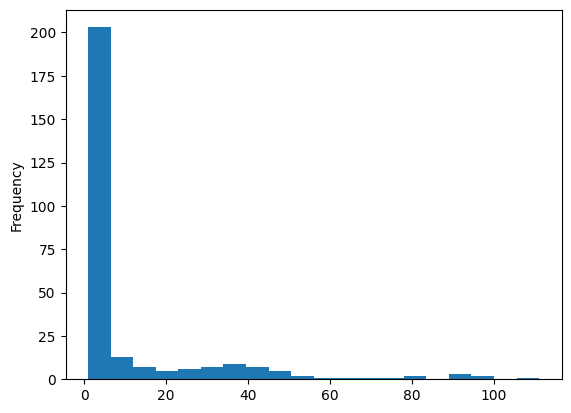

In [11]:
data['delivery_time'].plot.hist(bins = 20) # Histogram

<Axes: xlabel='delivery_time_discrete'>

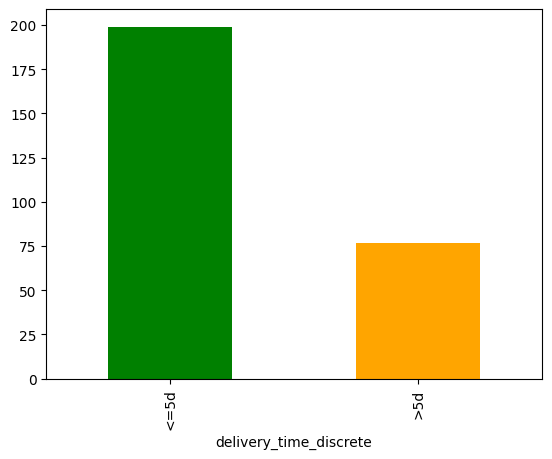

In [18]:
max_time = data ['delivery_time'].max()
data['delivery_time_discrete'] = pd.cut(data['delivery_time'], bins=[0, 5, max_time], labels=["<=5d", ">5d"])

data["delivery_time_discrete"].value_counts(sort=False).plot.bar(color=["green", "orange"])

##### 8. Compute the correlation matrix for the numerical attributes. Plot the matrix of the scatterplots. Plot the heatmap of the correlation matrix.

In [15]:
corr = data.corr(numeric_only=True)
print(corr)

                     ID     price       tax  order_weekday  order_year  \
ID             1.000000  0.045689  0.045688      -0.061625   -0.034137   
price          0.045689  1.000000  1.000000      -0.096767   -0.010902   
tax            0.045688  1.000000  1.000000      -0.096768   -0.010901   
order_weekday -0.061625 -0.096767 -0.096768       1.000000   -0.123836   
order_year    -0.034137 -0.010902 -0.010901      -0.123836    1.000000   
order_month   -0.016637 -0.072336 -0.072338       0.101561   -0.091685   
order_day     -0.148114  0.074735  0.074735       0.054717   -0.089967   
order_quarter -0.016370 -0.054969 -0.054970       0.091611   -0.109379   
delivery_time  0.235469  0.062524  0.062523       0.029781   -0.063159   

               order_month  order_day  order_quarter  delivery_time  
ID               -0.016637  -0.148114      -0.016370       0.235469  
price            -0.072336   0.074735      -0.054969       0.062524  
tax              -0.072338   0.074735      -0.054

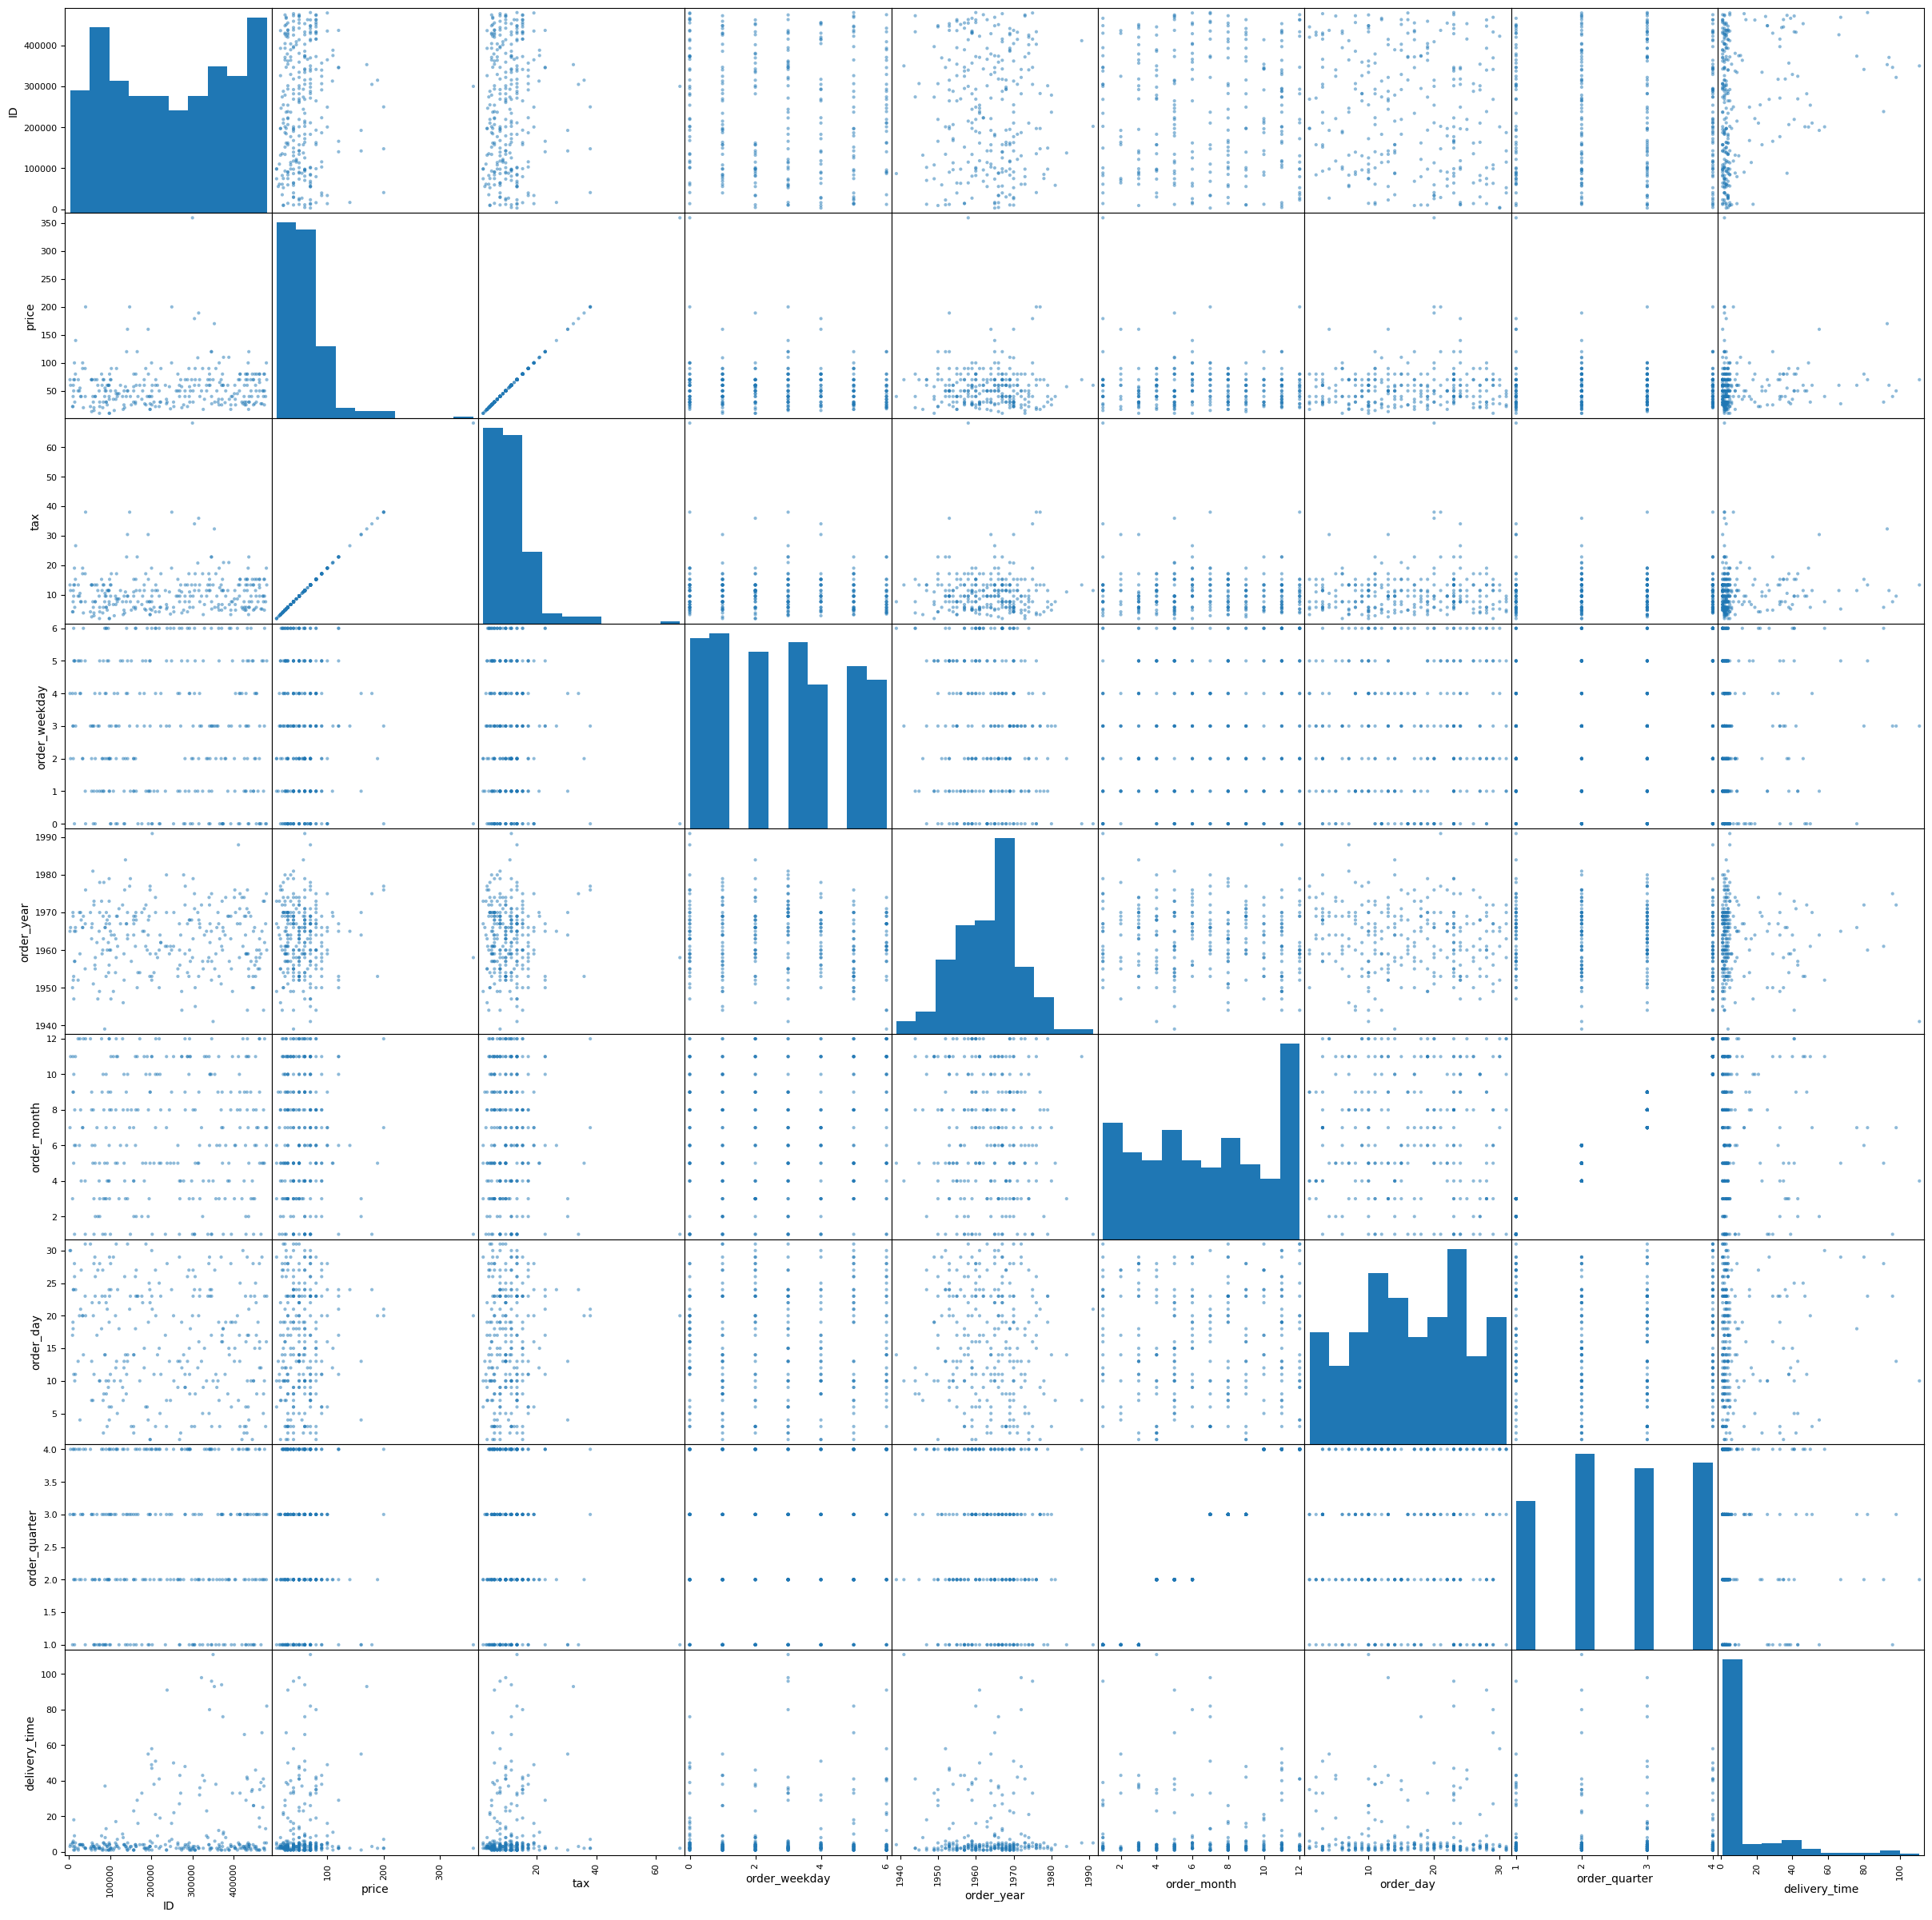

In [20]:
# Plot scatter matrix
matrix_of_scatter_plots = pd.plotting.scatter_matrix(data, figsize=(30,30))